# TITANIC SURVIVAL PREDICTION<br/>

# Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.<br/>

# The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived. <br/>

PassengerId:- Unique number assign to all passengers. <br/>
Survived :- Yes(1)/N0(0) <br/>
Pclass:- First class(1),Second class(2),Third class(3) <br/>
Name:- Name of passenger <br/>
Sex:- Male/Female <br/>
Age:- Age of the person <br/>
SibSp:- Siblings/Spouses Aboard <br/>
Parch:- Parents/Children Aboard <br/>
Ticket:- Unique Number of ticket <br/>
Fare:- Fare price <br/>
Cabin:- Seat allocated <br/>
Embarked:- The port where passengers boarded the Titanic. There are three possible values for this attribute: (C,Q,S) <br/>

IMPORTING RELEVANT LIBRARIES

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

UPLOADING DATASET

In [244]:
df = pd.read_csv("Titanic-Dataset.csv")

In [245]:
df.head() #first 5 records of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
df.shape #dimension of the dataset

(891, 12)

In [247]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
df.columns #features in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

DATA PREPROCESSING AND VISUALIZATION

In [249]:
df.isnull().sum() #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

INTERPRETATION: Age, Cabin, Embarked have null values.

In [250]:
df.describe() #descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [251]:
df.dtypes #data type of each feature

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

EXPLORING CATEGORICAL ATTRIBUTES

In [252]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

ENCODING USING MAP()

In [253]:
sex = {'male' : 1, 'female' :2} #encoding 
df['Sex'] = df['Sex'].map(sex)

In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [255]:
# Dropping unique values from dataset
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [256]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,2,38.0,1,0,71.2833,C
2,1,3,2,26.0,0,0,7.9250,S
3,1,1,2,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [257]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

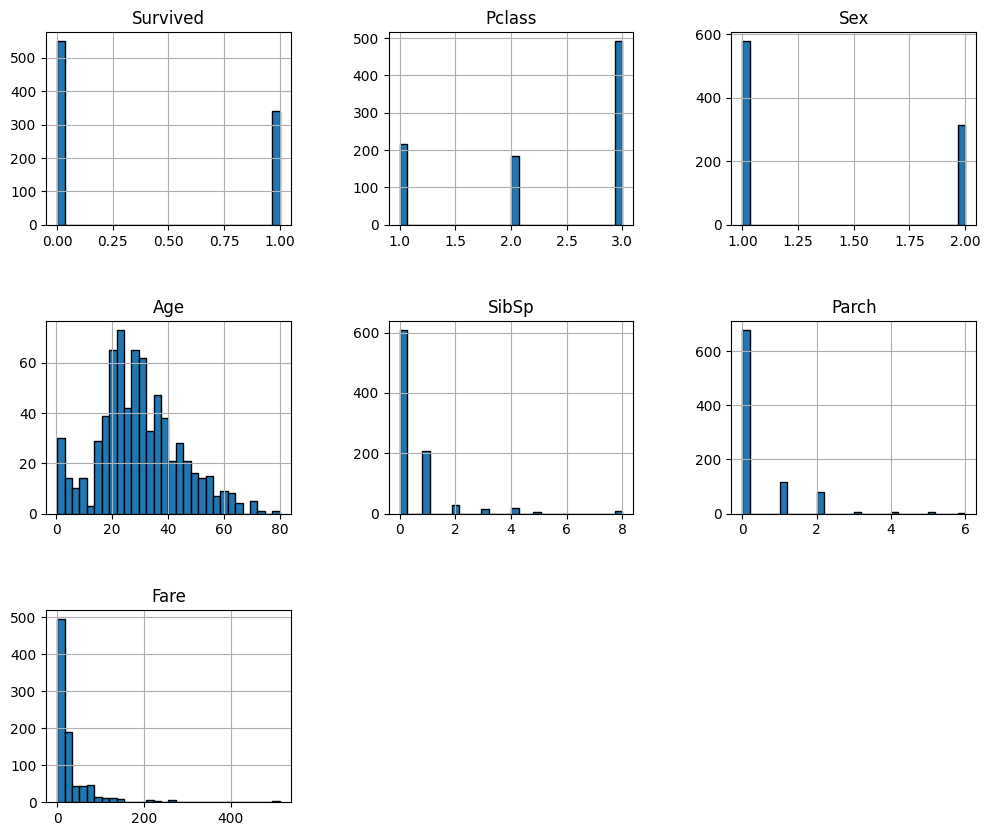

In [258]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

Handling Null Values

In [259]:
median = df['Age'].median()
median

28.0

In [260]:
df['Age'] = df['Age'].fillna(median)

In [261]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [262]:
df['Embarked'] = df['Embarked'].fillna('S')

In [263]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [264]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [265]:
emb = {'S' : 1, 'C' :2, 'Q' :3} #encoding
df['Embarked'] = df['Embarked'].map(emb)

In [266]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1
3,1,1,2,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [267]:
df.duplicated().sum() #checking for duplicates

116

INTERPRETATION: 116 records are duplicates

In [268]:
df = df.drop_duplicates() #removing duplicates

In [269]:
df.duplicated().sum() #rechecking duplicates

0

In [270]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

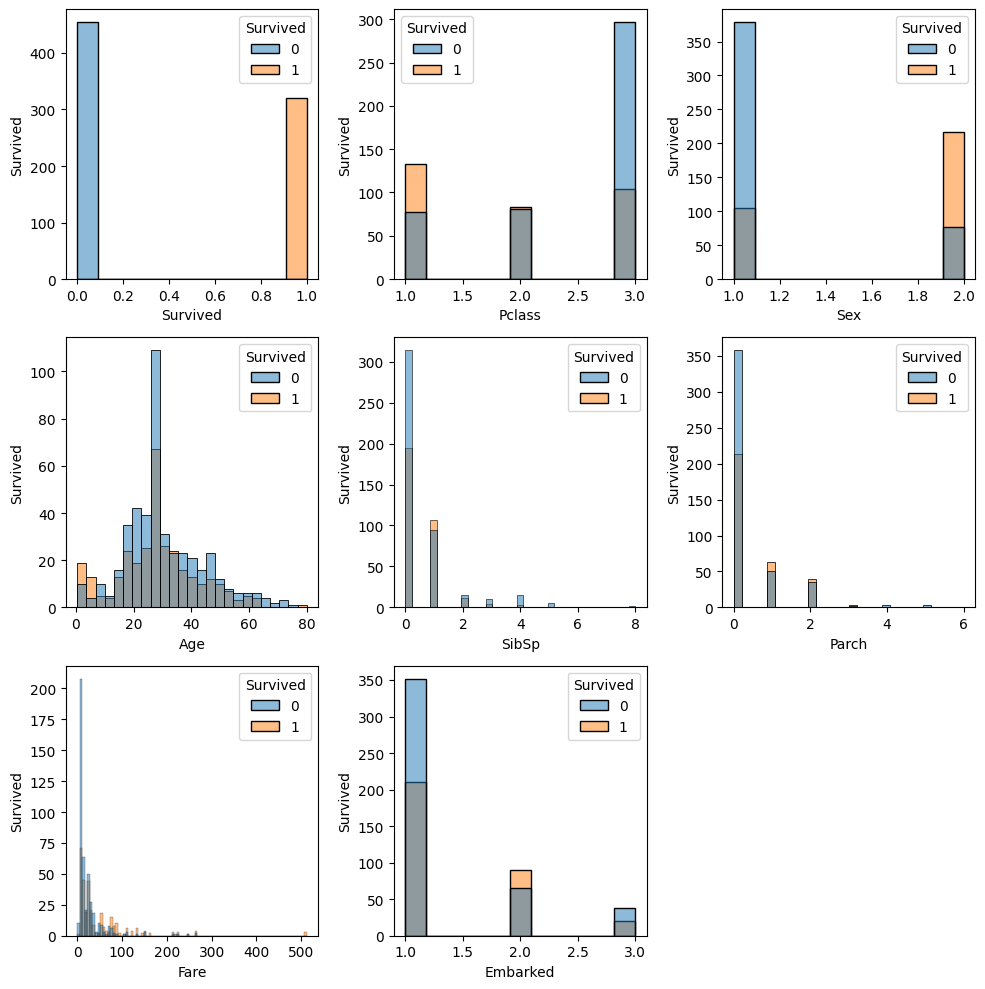

In [271]:
#visualising each feature wrt survived count
plt.figure(figsize=(10,10))
i=1
for col in df:
    if i <9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=df[col],hue=df['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
    i=i+1
plt.tight_layout()

SCALING NUMERICAL FEATURES WITHIN RANGE O-1 USING MINMAXSCALER()

In [272]:
scaler = MinMaxScaler()
numerical_columns = ['Age','SibSp','Parch','Fare']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [273]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,0.125,0.0,0.014151,1
1,1,1,2,0.472229,0.125,0.0,0.139136,2
2,1,3,2,0.321438,0.000,0.0,0.015469,1
3,1,1,2,0.434531,0.125,0.0,0.103644,1
4,0,3,1,0.434531,0.000,0.0,0.015713,1


<Axes: >

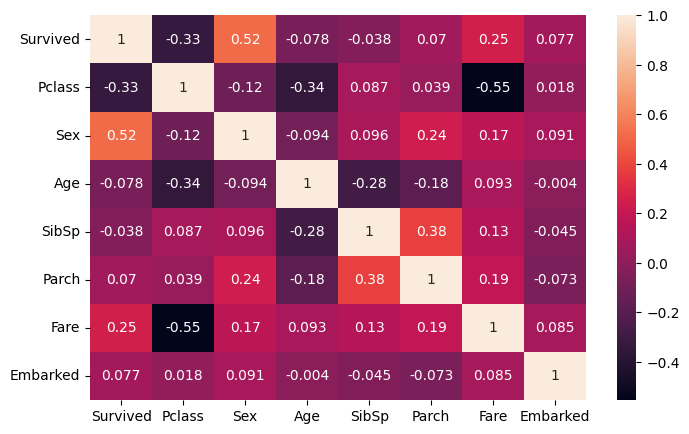

In [274]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr( numeric_only = True), annot=True)

FEATURE ENGINEERING

In [275]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
X = df[features]
y = df['Survived']

In [276]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,0.125,0.0,0.014151,1
1,1,2,0.472229,0.125,0.0,0.139136,2
2,3,2,0.321438,0.000,0.0,0.015469,1
3,1,2,0.434531,0.125,0.0,0.103644,1
4,3,1,0.434531,0.000,0.0,0.015713,1


In [277]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

TRAIN-TEST SPLIT

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104, test_size=0.20, shuffle=True)

In [279]:
print("Training set size of input fetaures: ",X_train.shape)
print("Training set size of output fetaure: ",y_train.shape)
print()
print("Testing set size of input fetaures: ",X_test.shape)
print("Testing set size of output fetaure: ",y_test.shape)

Training set size of input fetaures:  (620, 7)
Training set size of output fetaure:  (620,)

Testing set size of input fetaures:  (155, 7)
Testing set size of output fetaure:  (155,)


MODEL BUILDING

1. LOGISTIC REGRESSION

In [280]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [281]:
y_pred=clf.predict(X_test)

In [282]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1])

In [283]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[78 14]
 [24 39]]


INTERPRETATION: 

78: True Negatives i.e Passengers who did not survive and were correctly predicted as not survived.<br/>
14: False Positive i.e  Passengers who did not survive but were incorrectly predicted as survived.<br/>
24: False Negatives i.e Passengers who survived but were incorrectly predicted as not survived.<br/>
39: True Positives i.e Passengers who survived and were correctly predicted as survived.

In [284]:
acc = accuracy_score(y_test,y_pred)
acc*100

75.48387096774194

In [285]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        92
           1       0.74      0.62      0.67        63

    accuracy                           0.75       155
   macro avg       0.75      0.73      0.74       155
weighted avg       0.75      0.75      0.75       155



2. DECISION TREE

[Text(0.5, 0.875, 'Sex <= 1.5\ngini = 0.485\nsamples = 775\nvalue = [455.0, 320.0]'),
 Text(0.25, 0.625, 'Age <= 0.076\ngini = 0.338\nsamples = 483\nvalue = [379, 104]'),
 Text(0.125, 0.375, 'SibSp <= 0.312\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.375, 0.375, 'Pclass <= 1.5\ngini = 0.31\nsamples = 459\nvalue = [371, 88]'),
 Text(0.3125, 0.125, 'gini = 0.459\nsamples = 115\nvalue = [74, 41]'),
 Text(0.4375, 0.125, 'gini = 0.236\nsamples = 344\nvalue = [297, 47]'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.385\nsamples = 292\nvalue = [76, 216]'),
 Text(0.625, 0.375, 'Age <= 0.026\ngini = 0.103\nsamples = 165\nvalue = [9, 156]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6875, 0.125, 'gini = 0.093\nsamples = 163\nvalue = [8, 155]'),
 Text(0.875, 0.375, 'Fare <= 0.046\ngini = 0.498\nsamples = 127\nvalue = [67, 

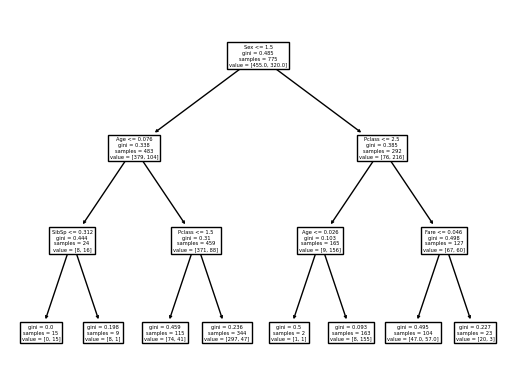

In [286]:
dtreeclf = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtreeclf = dtreeclf.fit(X,y)
tree.plot_tree(dtreeclf, feature_names=features)

In [287]:
#Function to check for the accuracy of the training and testing set

def evaluate_model(dt_classifier): 
    print("Training Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [288]:
evaluate_model(dtreeclf)

Training Accuracy : 81.7741935483871
Train Confusion Matrix:
[[319  44]
 [ 69 188]]
--------------------------------------------------
Test Accuracy : 77.41935483870968
Test Confusion Matrix:
[[81 11]
 [24 39]]


In [289]:
#Function to predict the label for new data

def prediction(dtreeclf, features):
    
    if not isinstance(features[0], list):     #ensure features is a list of lists
        features = [features]

    columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']    #ensure features is a list of lists
    test_data = pd.DataFrame(features)   #convert the features into a DataFrame
    scaler = MinMaxScaler()
    numerical_columns = ['Age','SibSp','Parch','Fare']
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    predictions = dtreeclf.predict(test_data)   #predict
    
    return predictions  

In [290]:
print(df['Pclass'].value_counts())
print()
print(df['Sex'].value_counts())
print()
print(df['Embarked'].value_counts())

Pclass
3    401
1    210
2    164
Name: count, dtype: int64

Sex
1    483
2    292
Name: count, dtype: int64

Embarked
1    562
2    155
3     58
Name: count, dtype: int64


In [291]:
print(prediction(dtreeclf,[[2,2,35,0,1,2000,3]]))

[1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [296]:
print(prediction(dtreeclf, [[1,2,45,0,0,1000,1], [3,1,20,1,1,5000,2]]))

[1 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
